In [28]:
import pandas as pd
import numpy as np
from binfit import Hist1d
from binfit import Hist2d

In [29]:
df_umatch = pd.read_pickle('./ulnu.pickle')
dfD = pd.read_pickle('./D.pickle')
dfDst = pd.read_pickle('./Dst.pickle')
dfDstst = pd.read_pickle('./Dstst.pickle')

In [30]:
var= 'gx_m'
#var_binning = np.array([0., 1.6, 1.9, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7, 4.2, 5.0])
var_binning = np.array([0.,1.6, 1.9, 2.3, 2.5, 2.8])
#var_binning = np.linspace(0.,2.8,20)
binrange = (var_binning[0],var_binning[-1])

hsig = Hist1d(bins=var_binning, range=binrange, data=df_umatch[var], weights=df_umatch['tot_w_0'])
hD = Hist1d(bins=var_binning, range=binrange, data=dfD[var], weights=dfD['tot_w_0'])
hDst = Hist1d(bins=var_binning, range=binrange, data=dfDst[var], weights=dfDst['tot_w_0'])
hDstst = Hist1d(bins=var_binning, range=binrange, data=dfDstst[var], weights=dfDstst['tot_w_0'])
dftot = df_umatch.append([dfD,dfDst,dfDstst])
htot = Hist1d(bins=var_binning, range=binrange, data=dftot[var], weights=dftot['tot_w_0'])

/home/sutclw/anaconda3/envs/belle2_analysis/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [31]:
# Run for 2D fitting

var2='event_q2'
#var2_binning = np.array([0., 2, 4, 6, 8, 10, 12, 14, 26])
var2_binning = np.array([0., 2, 4, 6, 8])
hsig2d = Hist2d(bins=[var_binning,var2_binning],data=[df_umatch[var],df_umatch[var2]], weights=df_umatch['tot_w_0'])
hD2d = Hist2d(bins=[var_binning,var2_binning], range=binrange, data=[dfD[var],dfD[var2]], weights=dfD['tot_w_0'])
hDst2d = Hist2d(bins=[var_binning,var2_binning], range=binrange, data=[dfDst[var],dfDst[var2]], weights=dfDst['tot_w_0'])
hDstst2d = Hist2d(bins=[var_binning,var2_binning], range=binrange, data=[dfDstst[var],dfDstst[var2]], weights=dfDstst['tot_w_0'])
htot2D = Hist2d(bins=[var_binning,var2_binning], range=binrange, data=[dftot[var],dftot[var2]], weights=dftot['tot_w_0'])


In [32]:


#from importlib import reload 
import binfit

#reload(binfit)
#reload(binfit.models.tensormodelbuilder)
#reload(binfit.models.modelbuilder)
#reload(binfit.fitting.fitter)
#reload(binfit.parameters.parametershandler)

import binfit
from binfit import Template1d
from binfit import Template2d
from binfit.fitting import BinFitter
from binfit.parameters.parametershandler import ParameterHandler

from binfit.models.modelbuilder  import ModelBuilder
from binfit.templates.multitemplate import MultiNormTemplate

In [46]:
from scipy.optimize import minimize
# container for all parameters 
params = ParameterHandler()

tsig = Template1d('ulnu',var, hsig,params,'indianred')
tD= Template1d('D',var, hD,params,'navy')
tDst= Template1d('Dst',var, hDst,params,'orange')
tDstst= Template1d('Dstst',var, hDstst,params,'olivedrab')

# 2D case
#tsig = Template2d('ulnu',var, hsig2d,params,'indianred')
#tD= Template2d('D',var, hD2d,params,'navy')
#tDst= Template2d('Dst',var, hDst2d,params,'orange')
#tDstst= Template2d('Dstst',var, hDstst2d,params,'olivedrab')

ctemps = {'D':tD,'Dst':tDst,'Dstst':tDstst}
pars = {'D':0.3,'Dst':0.5}
# Make a Multinorm template this requires N -1 fractions 
tbkg = MultiNormTemplate('clnu', ctemps,params,pars,color = 'lightskyblue')

#hdata = h.from_binned_data(data,var_binning)
hdata = htot
# 2D case
#hdata = htot2D


# here the classic variation scheme of max is used where a new covariance matrix is computed from variations
# and added with the original diagonal covariance according to max' implementation. This functions
#
#tD.add_variation(dfD[var],dfD['Dlnu_FF_downweight0']*dfD['tot_w_0']/dfD['Dlnu_FF_weight'],dfD['Dlnu_FF_upweight0']*dfD['tot_w_0']/dfD['Dlnu_FF_weight'])
#tD.add_variation([dfD[var],dfD[var2]],dfD['Dlnu_FF_downweight0'],dfD['Dlnu_FF_upweight0'])
#[dftot[var],dftot[var2]]

# add a single parameter variation not working 100% yet 
# here the up and down variations are stored in the template  and used 
#tDst.add_singlepar_variation(dfDst[var],dfDst['Dlnu_FF_downweight1'],dfDst['Dlnu_FF_upweight1'],'Dlnu_FF_weight')
#tD.add_singlepar_variation(dfD[var],dfD['Dlnu_FF_downweight1'],dfD['Dlnu_FF_upweight1'],'Dlnu_FF_weight')
#tDstst.add_singlepar_variation(dfDstst[var],dfDstst['Dlnu_FF_downweight1'],dfDstst['Dlnu_FF_upweight1'],'Dlnu_FF_weight')
#tsig.add_singlepar_variation(df_umatch[var],df_umatch['Dlnu_FF_downweight1'],df_umatch['Dlnu_FF_upweight1'],'Dlnu_FF_weight')
#tD.add_singlepar_variation([dfD[var],dfD[var2]],dfD['Dlnu_FF_downweight1'],dfD['Dlnu_FF_upweight1'],'Dlnu_FF_1')


nmodel = ModelBuilder(params,hdata)
# add templates, each of which have a yield
# the capability of sharing yields will be possible
# note that it can be a base or multitemplate
# later I plan to make an abstract model and have TemplateModel and ChannelModel as channels have multiple datasets

nmodel.AddTemplate(tsig, 1000.)
nmodel.AddTemplate(tbkg, 4000.)

#model.AddTemplate(tD, 2000)
# add a gaussian constraint on a given parameter
# e.g here we constrain 
#nmodel.AddConstraint('fraction_D',0.03,0.0001)

# initialise the block diagonal covariance for all bin paramaters
# this is again in line with what max does 
nmodel._create_block_diag_inv_corr_mat()
nmodel.TemplateMatrix()
nmodel.RelativeErrorMatrix()
nmodel.InitialiseBinPars()
nmodel.FractionConverter()
# the model computes the number of expected events 
# this is compared with data with several cost function 
# choices
#model.xexpected()

# the model has chi2 or NLL functions depending on the users wish 
#model.chi2(params._npars)
#model.NLL(params._npars)






[array([[0., 0.]]), array([[ 1.,  0.],
       [ 0.,  1.],
       [-1., -1.]])]
[array([[1.]]), array([[0.],
       [0.],
       [1.]])]


In [42]:
nmodel.chi2(params._npars)

75.57932003504334

In [47]:
import time
import timeit
start = timeit.timeit()
%timeit minimize(nmodel.chi2,params._npars)
end = timeit.timeit()
print(end - start)

The slowest run took 48.14 times longer than the fastest. This could mean that an intermediate result is being cached.
26 ms ± 50.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-0.0005495649966178462


/home/sutclw/anaconda3/envs/belle2_analysis/lib/python3.7/site-packages/binfit/parameters/parametershandler.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return(self._npars[indices])
/home/sutclw/anaconda3/envs/belle2_analysis/lib/python3.7/site-packages/binfit/parameters/parametershandler.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return(self._npars[indices])
/home/sutclw/anaconda3/envs/belle2_analysis/lib/python3.7/site-packages/binfit/parameters/parametershandler.py:37: FutureWarning: Using a non-tuple sequence for mul

In [48]:
fitter = BinFitter(nmodel,'iminuit')

In [49]:
fitter.do_fit()

[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]


FCN = 7.047673356257263 
 TOTAL NCALL = 523 
 NCALLS = 523 
 
 
 EDM = 7.240835187345671e-12 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,fraction_D,0.0300002,7.07107e-05,,,,,No
1,fraction_Dst,0.922925,0.0190247,,,,,No
2,ulnu_yield,1193.09,44.1324,,,,,No
3,clnu_yield,3686.49,58.5695,,,,,No
4,ulnu_binpar_0,-0.098518,0.707549,,,,,No
5,ulnu_binpar_1,0.292946,0.70315,,,,,No
6,ulnu_binpar_2,-0.101902,0.706219,,,,,No
7,ulnu_binpar_3,-0.0337986,0.705591,,,,,No
8,ulnu_binpar_4,0.0461463,0.706364,,,,,No
9,D_binpar_0,-0.0146809,0.707172,,,,,No


FCN = 7.047673356250049 
 TOTAL NCALL = 669 
 NCALLS = 146 
 
 
 EDM = 6.749939055169364e-21 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,fraction_D,0.0300002,7.07107e-05,,,,,No
1,fraction_Dst,0.922925,0.0190248,,,,,No
2,ulnu_yield,1193.09,44.1323,,,,,No
3,clnu_yield,3686.49,58.5698,,,,,No
4,ulnu_binpar_0,-0.0985179,0.707549,,,,,No
5,ulnu_binpar_1,0.292946,0.70315,,,,,No
6,ulnu_binpar_2,-0.101903,0.706219,,,,,No
7,ulnu_binpar_3,-0.0337986,0.705591,,,,,No
8,ulnu_binpar_4,0.0461462,0.706364,,,,,No
9,D_binpar_0,-0.0146809,0.707172,,,,,No


MinimizeResult(fcn_min_val=7.047673356250049, params=<binfit.fitting.minimizer.Parameters object at 0x7feda6179410>, succes=True)

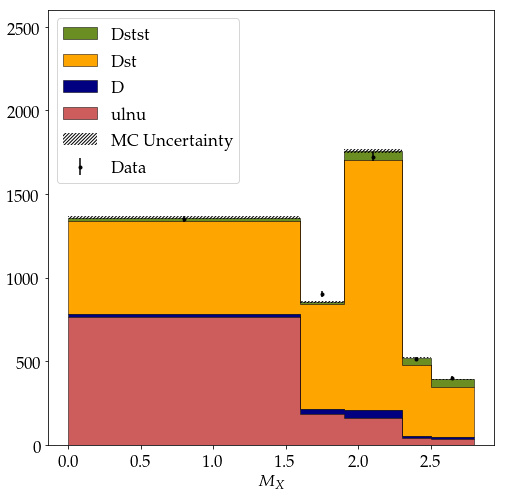

In [50]:
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'size':17,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis,All='True')

axis.legend(loc='upper left')
plt.ylim(top=2600)
plt.xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX_all.pdf')

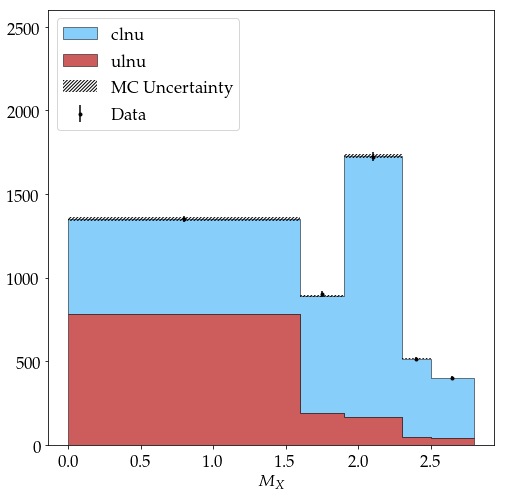

In [40]:
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'size':17,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis)

axis.legend(loc='upper left')
plt.ylim(top=2600)
plt.xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX.pdf')

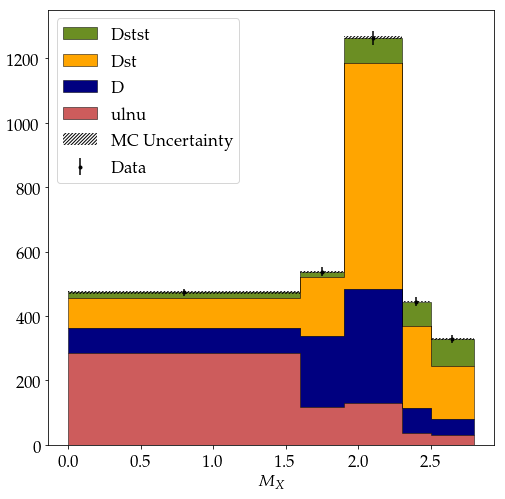

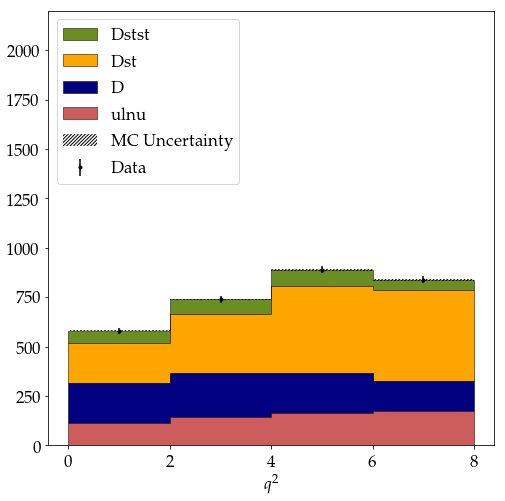

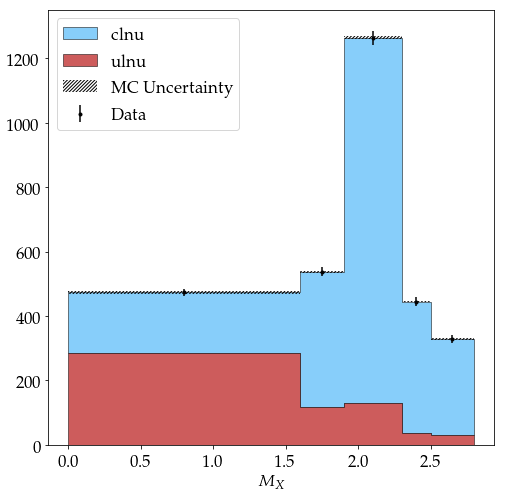

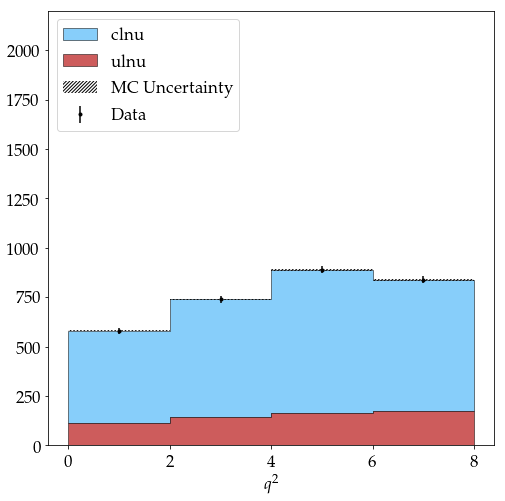

In [27]:
# For 2D fits


from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'size':17,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis,All='True',projection='x')
axis.legend()
plt.xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX_2D_fit_components.pdf')
plt.show()
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis,All='True',projection='y')
axis.legend(loc='upper left')

plt.xlabel(r'$q^{2}$')
plt.ylim(top=2200)
#plt.savefig("MX.pdf")
plt.savefig('q2_2D_fit_components.pdf')
plt.show()

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis,projection='x')
axis.legend()
plt.xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX_2D_fit.pdf')
plt.show()
fig, axis = plt.subplots(1,1, figsize=(8,8))
nmodel.plot_stacked_on(axis,projection='y')
axis.legend(loc='upper left')
plt.xlabel(r'$q^{2}$')
plt.ylim(top=2200)
#plt.savefig("MX.pdf")
plt.savefig('q2_2D_fit.pdf')
plt.show()
#fig, axis = plt.subplots(1,1, figsize=(8,8))
#model.plot_stacked_on(axis,All='True')
#axis.legend()
#lt.xlabel(r'$M_{X}$')
#plt.show()
#model.templates4

In [141]:
nmodel.UpErrors()
nmodel.DownErrors()

In [142]:
nmodel.down_errors


array([[[            nan,             nan,             nan,
                     nan,             nan]],

       [[-1.42436112e+02, -1.93235366e+02, -3.39197291e+01,
          1.61209076e+03,  2.04982867e+04]],

       [[-3.50332326e+02, -1.76505200e+02, -1.01519934e+02,
          1.28048288e+04,  2.13487408e+04]],

       [[-3.53371934e+01,  1.99802417e+04,  3.09951924e+05,
          1.12006290e+06,  2.30019668e+06]]])

In [128]:
df_umatch['Dlnu_FF_downweight1']=1

In [129]:
df_umatch['Dlnu_FF_downweight1']=0